<a href="https://colab.research.google.com/github/mobarakol/tutorial_notebooks/blob/main/InstructBLIP_V2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

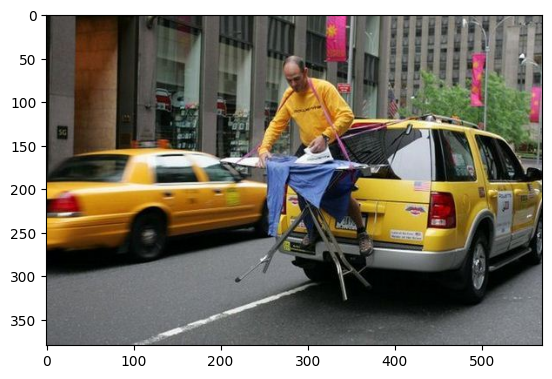

In [7]:
from PIL import Image
import requests
import matplotlib.pyplot as plt
url = "https://raw.githubusercontent.com/salesforce/LAVIS/main/docs/_static/Confusing-Pictures.jpg"
image = Image.open(requests.get(url, stream=True).raw).convert("RGB")
plt.imshow(image)

In [8]:
from transformers import BlipProcessor, BlipForConditionalGeneration
import torch
from PIL import Image
import matplotlib.pyplot as plt

processor = BlipProcessor.from_pretrained("Salesforce/blip-image-captioning-base")
if processor.tokenizer.eos_token is None:
    processor.tokenizer.eos_token = '<|eos|>'
model = BlipForConditionalGeneration.from_pretrained("prasanna2003/Instruct-blip-v2")

prompt = """Instruction: Answer the following input according to the image.
Input: Describe this image.
output: """

inputs = processor(image, prompt, return_tensors="pt")

output = model.generate(**inputs, max_length=100)
print(processor.tokenizer.decode(output[0]))

instruction : answer the following input according to the image. input : describe this image. output : the man is using a vehicle to move the object on the back. input : the vehicle is a vehicle that is powered by a motor. so the answer is motor. < | eos | > [SEP]
